# Usage
0. Download vscode. It's free and you can visualize the ipynb notebook files
1. Recommended: create a python env (I'm using python 3.8)
2. run `pip install -r requirements.txt`
3. Go to simulations sections and create as many as you want. You can choose between fixed or variable mortgage. 
4. Run imports sections
5. Run simulations sections
6. Go to plotting area and run it. You may choose different columns to plot. As an example, I'm plotting the accumulated interest over the years


### About the NaiveEuriborUpdater
This is pretty much a simplistic approach to how Euribor might change in the following 20-30 years. I'm using a pesimistic heuristic where every year Euribor goes up by 0.1 percentage points.
You can create your own EuriborUpdater classes as long as they expose `get_euribor_value()` and `update_euribor_value()`


# IMPORTS

In [1]:
from simulator import NaiveEuriborUpdater,VariableRateMortgage,SIMULATIONS_FOLDER,FixedRateMortgage
import pandas as pd
import matplotlib.pyplot as plt
import os

# SIMULATIONS

In [2]:
loan = 200_000

In [3]:
mortgage1_output_file='var_07_diff_01_inc'
euribor_updater = NaiveEuriborUpdater(
    initial_value=-0.00558, euribor_yearly_increment=0.001
)
mortgage1 = VariableRateMortgage(
    differential=0.007,
    loan=loan,
    output_file_name=mortgage1_output_file,
    periods=30 * 12,
    euribor_updater=euribor_updater,
)
mortgage1.simulate()



In [4]:
mortgage2_output_file='var_09_diff_015_inc'
euribor_updater = NaiveEuriborUpdater(
    initial_value=-0.00558, euribor_yearly_increment=0.0015
)
mortgage2 = VariableRateMortgage(
    differential=0.009,
    loan=loan,
    output_file_name=mortgage2_output_file,
    periods=30 * 12,
    euribor_updater=euribor_updater,
)
mortgage2.simulate()


In [5]:
fixed_1_percent = FixedRateMortgage(0.01,200_000,'fixed_1%')
fixed_1_percent.simulate()

# PLOTTING AREA

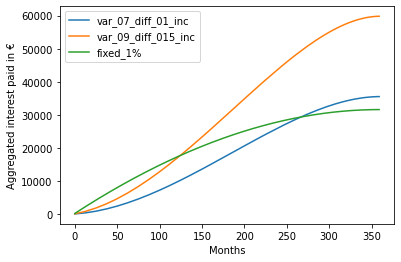

In [6]:
plt.ylabel('Aggregated interest paid in €')
plt.xlabel('Months')
for out_file in os.listdir(SIMULATIONS_FOLDER):
    df = pd.read_csv(os.path.join(SIMULATIONS_FOLDER,out_file),delimiter=';')
    plt.plot(df['accumulated_interest'],label=out_file)
plt.legend(loc="upper left")